In [16]:
#Notes Vector Field Plotting(3d)



#Find the electric field at any point in space given a point charge distribution
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def Efield_point(q,r1,r2):
    k=9e9
    n=r1.shape[0]
    for i in range(n):
        rx=r2[0]-r1[i][0]
        ry=r2[1]-r1[i][1]
        rz=r2[2]-r1[i][2]
        if i==0:
            E=k*q[i]*np.array([rx,ry,rz])/(rx*rx + ry*ry + rz*rz)**1.5
        else:
            E=E+(k*q[i]*np.array([rx,ry,rz])/(rx*rx + ry*ry + rz*rz)**1.5)
    return E

#r1 is a [n,3] shaped array where n is the number of charges, and the subarray contains the 3 coordinates in [x,y,z].
#q is a [n] shaped array where each value holds the charge in coloumbs of the point charge. Has to be in same order as r1.
#r2 is a [3] shaped array. Contains probe location. 





r2=np.array([0,0,1])  #Put the location of the location you want to probe
r1=np.array([[0,0,0]]) #Put multiple sources of points charges, each in a seperate 3 element array
qtot=np.array([1.6e-19]) #Put the charge associated with each source. must be in same number and order as the r1 array.


print(Efield_point(qtot,r1,r2))
#Questions: Field behavior at r=0?
#Potential way to store energy?
#dt discussion

[0.00e+00 0.00e+00 1.44e-09]


C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\kevin\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:2695: RuntimeWarning: invalid value encountered in greater
  mask = norm > 0


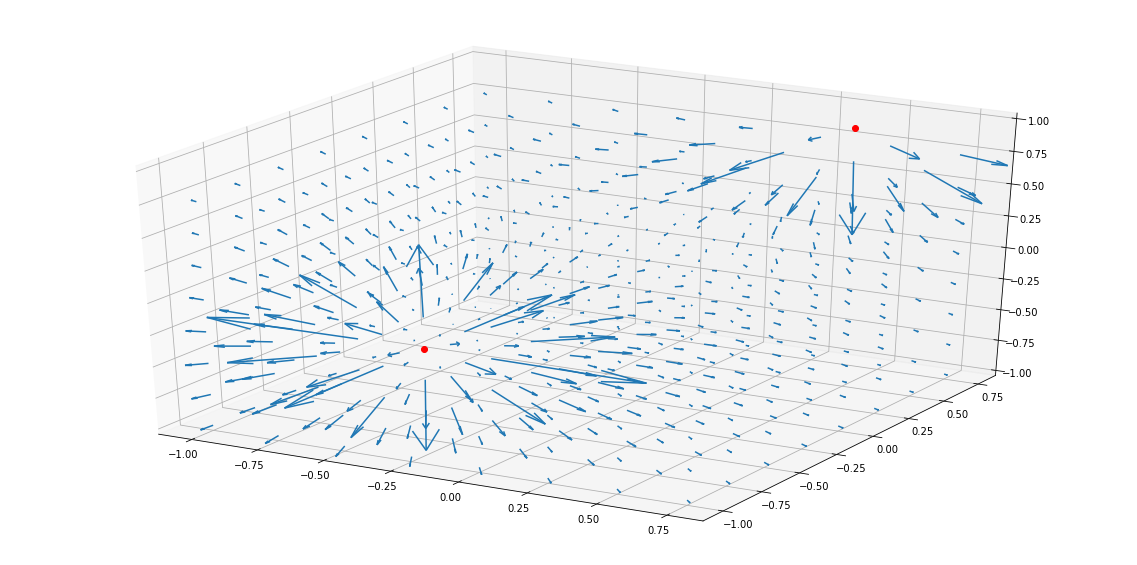

In [9]:
#Map the Electric Field
x, y, z = np.meshgrid(np.arange(-1, 1, .25),
                      np.arange(-1, 1, .25),
                      np.arange(-1, 1, .25))
q=1.6e-11
r2=np.array([x,y,z])
r1=np.array([[-.5,-.5,-.5],[.5,.5,1]])
qtot=np.array([q,q])

u,v,w=Efield_point(qtot,r1,r2)


fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, u, v, w, length=0.25)
for i in range(r1.shape[0]):
    ax.plot([r1[i][0]],[r1[i][1]],[r1[i][2]], 'ro')
plt.show()


In [10]:
#Compute Electric Field from any given charged wire.
def analyze
    import scipy.integrate as integrate
    import scipy.misc as misc
    import numpy as np


    def Efield_line(xt,yt,zt,a,b,charge,r2):
        k=9e9
        def dt(t):#Could be more accurate if analytical derivative is asked for.
            return ((misc.derivative(xt,t,dx=1e-6)**2) + (misc.derivative(yt,t,dx=1e-6)**2) + (misc.derivative(zt,t,dx=1e-6)**2))**.5
        def magr(t):
            return((r2[0]-xt(t))**2 + (r2[1]-yt(t))**2 + (r2[2]-zt(t))**2)**.5 
        def dEx(t):
            return k*charge(t)*dt(t)*(r2[0]-xt(t))/magr(t)**3
        def dEy(t): 
            return k*charge(t)*dt(t)*(r2[1]-yt(t))/magr(t)**3
        def dEz(t): 
        return k*charge(t)*dt(t)*(r2[2]-zt(t))/magr(t)**3
    return np.array([integrate.quad(dEx,a,b)[0],integrate.quad(dEy,a,b)[0],integrate.quad(dEz,a,b)[0]])
#xt,yt,zt are a parameterized version of the line
#a,b are the bounds for the integral with respsect to the one parameter
#charge is a function returning the charge density at any point with respect to the parameter
#r2 is a size [3] array containing the x,y,z coordinates of the probe location

In [12]:
def x(t): #Here's where you edit. Put in the parameterized x,y, and z. in terms of t (for line integral, just one parameter)
    return np.cos(t)
def y(t):
    return np.sin(t)
def z(t):
    return 0
def q(t):
    return 1.6e-10

a=0   #Bounds for the definite integral
b=2*np.pi
r2=np.array([0,0,1]) #Probe location

print(Efield_line(x,y,z,a,b,q,r2))



[6.04531320e-11 1.34202117e-10 3.19887572e+00]


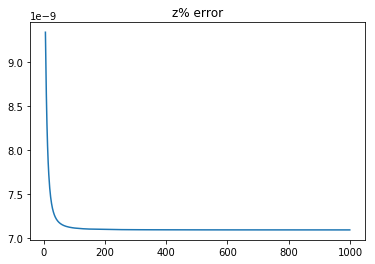

C:\Users\kevin\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


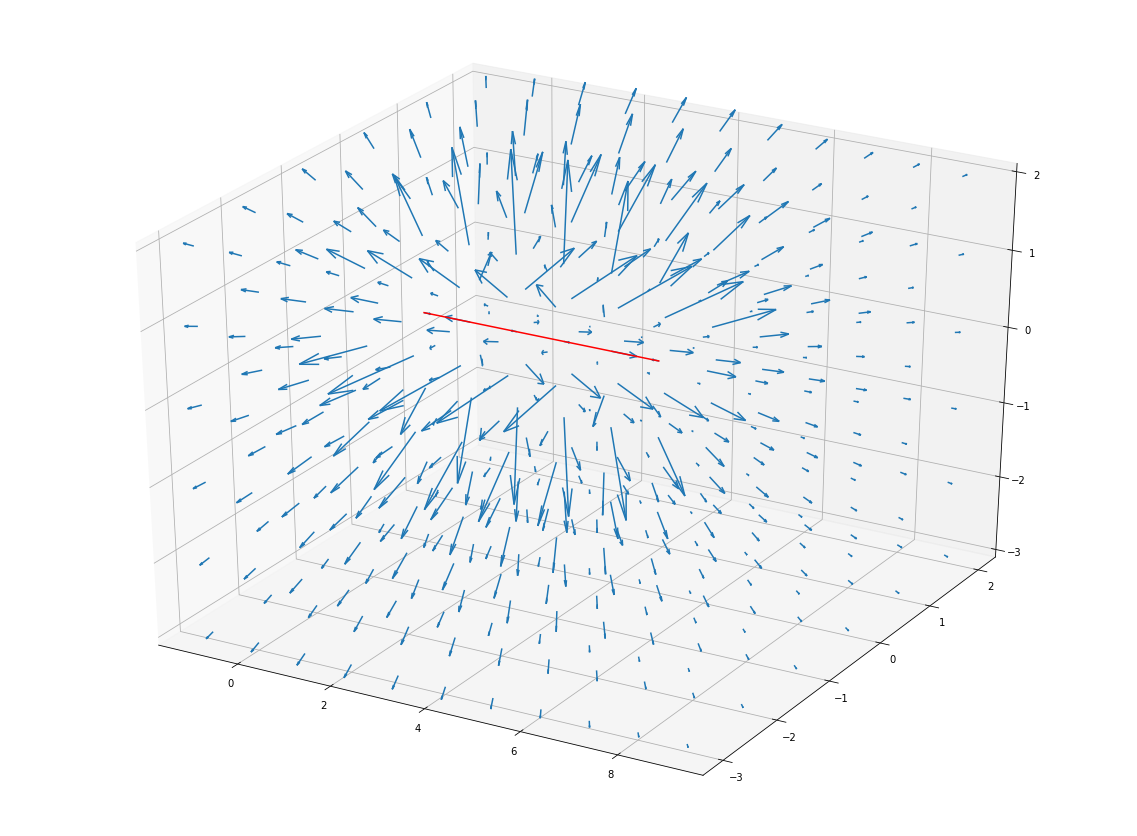

In [77]:
R=2.
def xt(t):
    return t
def yt(t):
    return t-t
def zt(t):
    return t-t
def q(t):
    return 1.6e-10
a=0   #Bounds for the definite integral
b=5.
l=5.
qe=1.6e-10
k=9e9

def analyticE(r2):
    x=qe*k*(((r2[0]-l)**2 + r2[1])**-.5 - (r2[0]**2 + r2[1]**2)**-.5)
    y=qe*k*((1/(-r2[1]))*((r2[0]-l)*((r2[0]-l)**2 + r2[1]**2)**-.5   - r2[0]*(r2[0]**2  + r2[1]**2)**-.5 )  )
    return np.array([x,y,0])


Eintegral=[]
Eanalytic=[]
z=np.arange(6,1000,1)

for i in z:
    r2=np.array([10,i,0])
    Eanalytic.append(analyticE(r2)[1])
    Eintegral.append(Efield_line(xt,yt,zt,a,b,q,r2)[1])
Eintegral=np.array(Eintegral)
Eanalytic=np.array(Eanalytic)
error=100*np.abs(Eintegral-Eanalytic)/Eanalytic
fig = plt.figure()
ax = fig.gca()
ax.plot(z,error)
ax.set_title('z% error')
plt.show()

x1, y1, z1 = np.meshgrid(np.arange(-1, 10, 1.),
                      np.arange(-3, 3, 1.),
                      np.arange(-3, 3, 1.))
u=np.empty(x1.shape)
v=np.empty(y1.shape)
w=np.empty(z1.shape)

for i in range(x1.shape[0]):
    for j in range(y1.shape[1]):
        for l in range(z1.shape[2]):
            r2=np.array([x1[i][j][l],y1[i][j][l],z1[i][j][l]])
            u[i][j][l], v[i][j][l], w[i][j][l] = Efield_line(xt,yt,zt,a,b,q,r2)
        

t=np.arange(a,b,.001)
x=xt(t)
y=yt(t)
z=zt(t)
# print(y)


fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
ax.quiver(x1, y1, z1, u, v, w, length=.5)
ax.plot(x,y,z,'r')


plt.show()



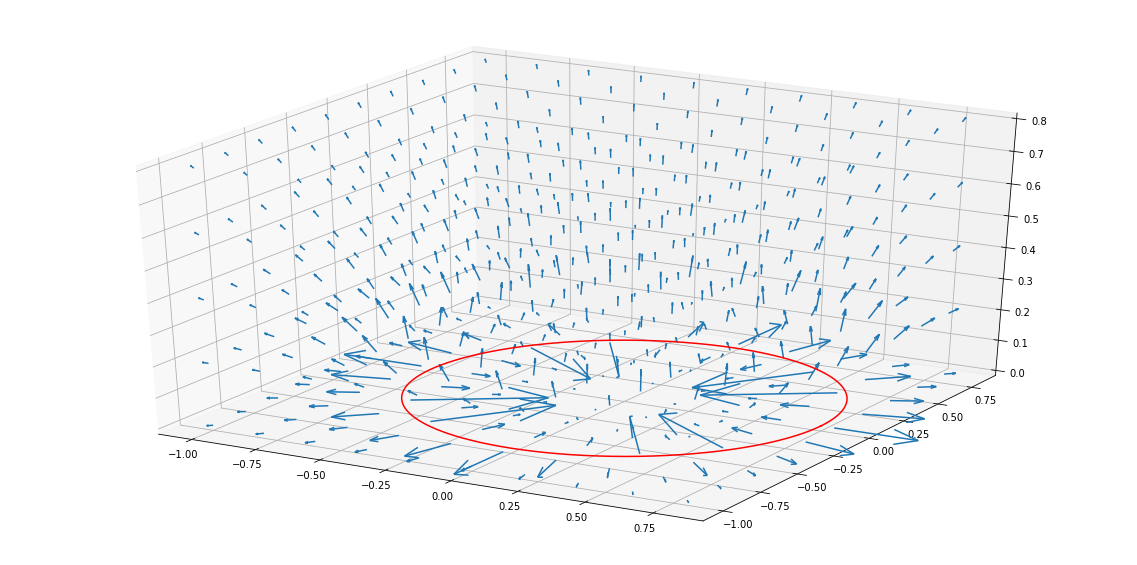

In [14]:
#Map the Electric Field generated by a ring of uniform charge density
def xt(t):
    return R*np.cos(t)
def yt(t):
    return R*np.sin(t)
def zt(t):
    return 0
def q(t):
    return 1.6e-12
R=.75
a=0   #Bounds for the definite integral
b=2*np.pi



x1, y1, z1 = np.meshgrid(np.arange(-1, 1, .2),
                      np.arange(-1, 1, .2),
                      np.arange(0, 1, .2))
u=np.empty(x1.shape)
v=np.empty(y1.shape)
w=np.empty(z1.shape)

for i in range(x1.shape[0]):
    for j in range(y1.shape[1]):
        for l in range(z1.shape[2]):
            r2=np.array([x1[i][j][l],y1[i][j][l],z1[i][j][l]])
            u[i][j][l], v[i][j][l], w[i][j][l] = Efield_line(xt,yt,zt,a,b,q,r2)
        

t=np.arange(a,b,.001)
x=xt(t)
y=yt(t)
z=zt(t)






fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.quiver(x1, y1, z1, u, v, w, length=0.5)
ax.plot(x,y,z,'r')


plt.show()

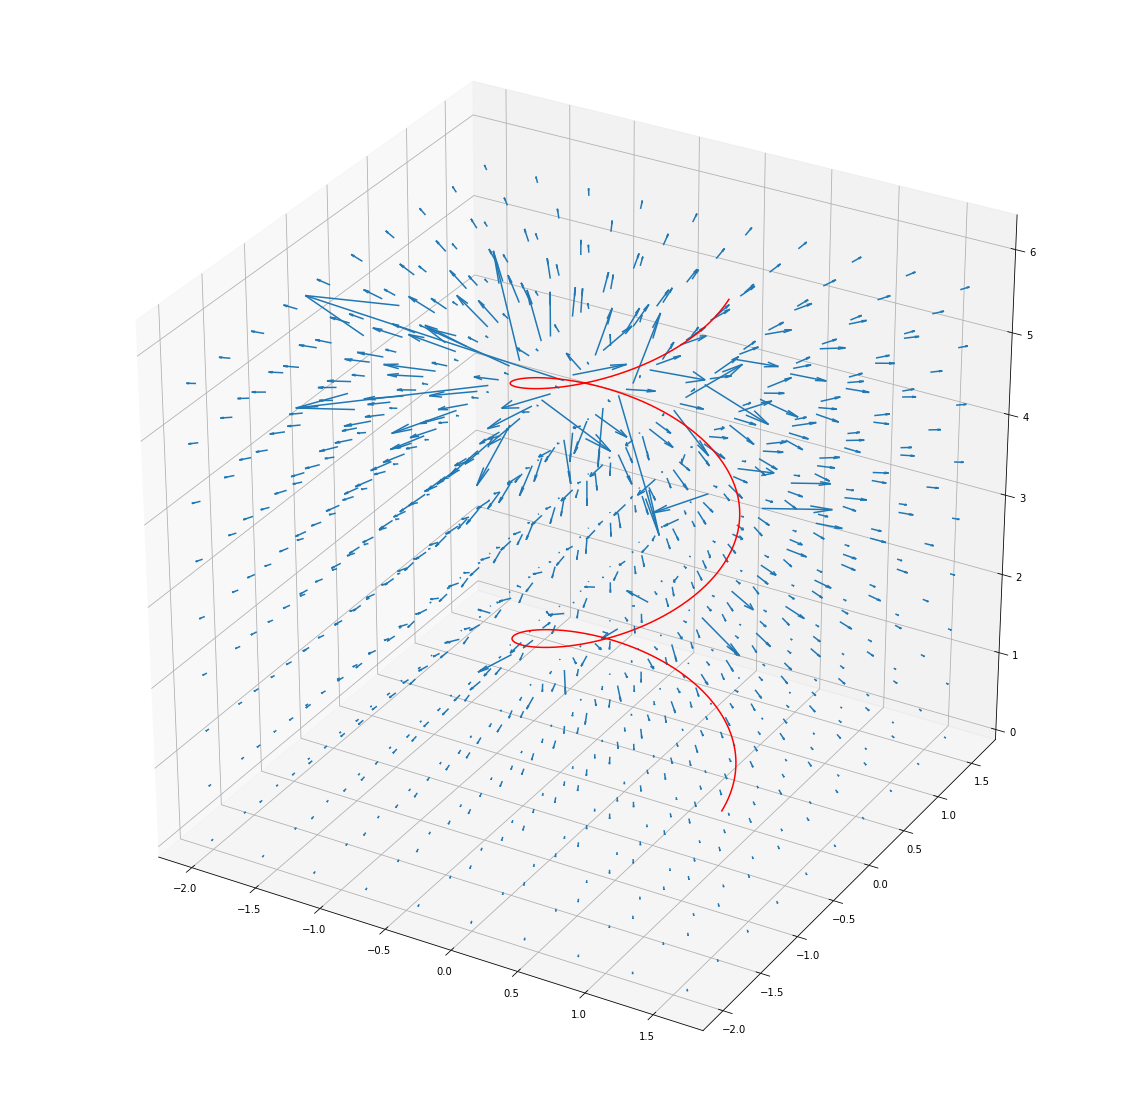

In [18]:
#Find the electric field generated by a coiled wire of increasing charge density
def xt(t):
    return R*np.cos(t)
def yt(t):
    return R*np.sin(t)
def zt(t):
    return .5*t
def q(t):
    return .5*(zt(t)**2)*1.6e-12
R=.75
a=0   #Bounds for the definite integral
b=4*np.pi





x1, y1, z1 = np.meshgrid(np.arange(-2, 2, .4),
                      np.arange(-2, 2, .4),
                      np.arange(0, zt(b), .7))
u=np.empty(x1.shape)
v=np.empty(y1.shape)
w=np.empty(z1.shape)

for i in range(x1.shape[0]):
    for j in range(y1.shape[1]):
        for l in range(z1.shape[2]):
            r2=np.array([x1[i][j][l],y1[i][j][l],z1[i][j][l]])
            u[i][j][l], v[i][j][l], w[i][j][l] = Efield_line(xt,yt,zt,a,b,q,r2)
        

t=np.arange(a,b,.001)
x=xt(t)
y=yt(t)
z=zt(t)


fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.quiver(x1, y1, z1, u, v, w, length=.5)
ax.plot(x,y,z,'r')


plt.show()

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


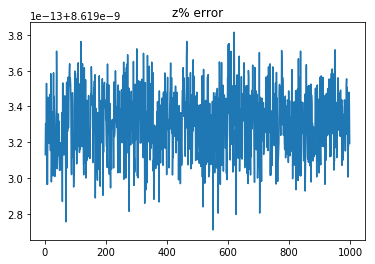

In [22]:
#Check the error of the method against the analytical solution for E field at any point z above the center of a charged wire.
R=2.
def xt(t):
    return R*np.cos(t)
def yt(t):
    return R*np.sin(t)
def zt(t):
    return 0
def q(t):
    return 1.6e-10
a=0   #Bounds for the definite integral
b=2*np.pi
qe=1.6e-10
k=9e9

def analyticE(z):
    return k*qe*2*np.pi*R*z/(R**2 + z**2)**1.5

t=1000
n=1e-6
# print(((misc.derivative(xt,t,dx=n)**2) + (misc.derivative(yt,t,dx=n)**2) + (misc.derivative(zt,t,dx=n)**2))**.5)


Eintegral=[]
Eanalytic=[]
z=np.arange(0,1000,1)

for i in range(len(z)):
    Eanalytic.append(analyticE(z[i]))
    Eintegral.append(Efield_line(xt,yt,zt,a,b,q,np.array([0,0,z[i]]))[2])
Eintegral=np.array(Eintegral)
Eanalytic=np.array(Eanalytic)
error=100*np.abs(Eintegral-Eanalytic)/Eanalytic
fig = plt.figure()
ax = fig.gca()
ax.plot(z,error)
ax.set_title('z% error')
plt.show()



In [13]:
#Create a function that returns the electric field generated by any surface with a charge density sigma
import scipy.integrate as integrate
import scipy.misc as misc
import numpy as np

def Efield_surface(xt,yt,zt,a,b,gfun,hfun,charge,r2):
    k=9e9
    def partd(func, var=0, point=[]):
        args = point[:]
        def wraps(x):
            args[var] = x
            return func(*args)
        return misc.derivative(wraps, point[var], dx = 1e-6)

    def dA(t,s):#Could be more accurate if analytical derivative is asked for.
        dt=(partd(xt,var=0,point=[t,s])**2 + partd(yt,var=0,point=[t,s])**2 + partd(zt,var=0,point=[t,s])**2)**.5
        ds=(partd(xt,var=1,point=[t,s])**2 + partd(yt,var=1,point=[t,s])**2 + partd(zt,var=1,point=[t,s])**2)**.5
        return dt*ds
        
    def magr(t,s):
        return((r2[0]-xt(t,s))**2 + (r2[1]-yt(t,s))**2 + (r2[2]-zt(t,s))**2)**.5 
    def dEx(t,s):
        return k*charge(t,s)*dA(t,s)*(r2[0]-xt(t,s))/magr(t,s)**3
    def dEy(t,s): 
        return k*charge(t,s)*dA(t,s)*(r2[1]-yt(t,s))/magr(t,s)**3
    def dEz(t,s):
        return k*charge(t,s)*dA(t,s)*(r2[2]-zt(t,s))/magr(t,s)**3
    
    return np.array([integrate.dblquad(dEx,a,b,gfun,hfun)[0],
                     integrate.dblquad(dEy,a,b,gfun,hfun)[0],
                     integrate.dblquad(dEz,a,b,gfun,hfun)[0]])


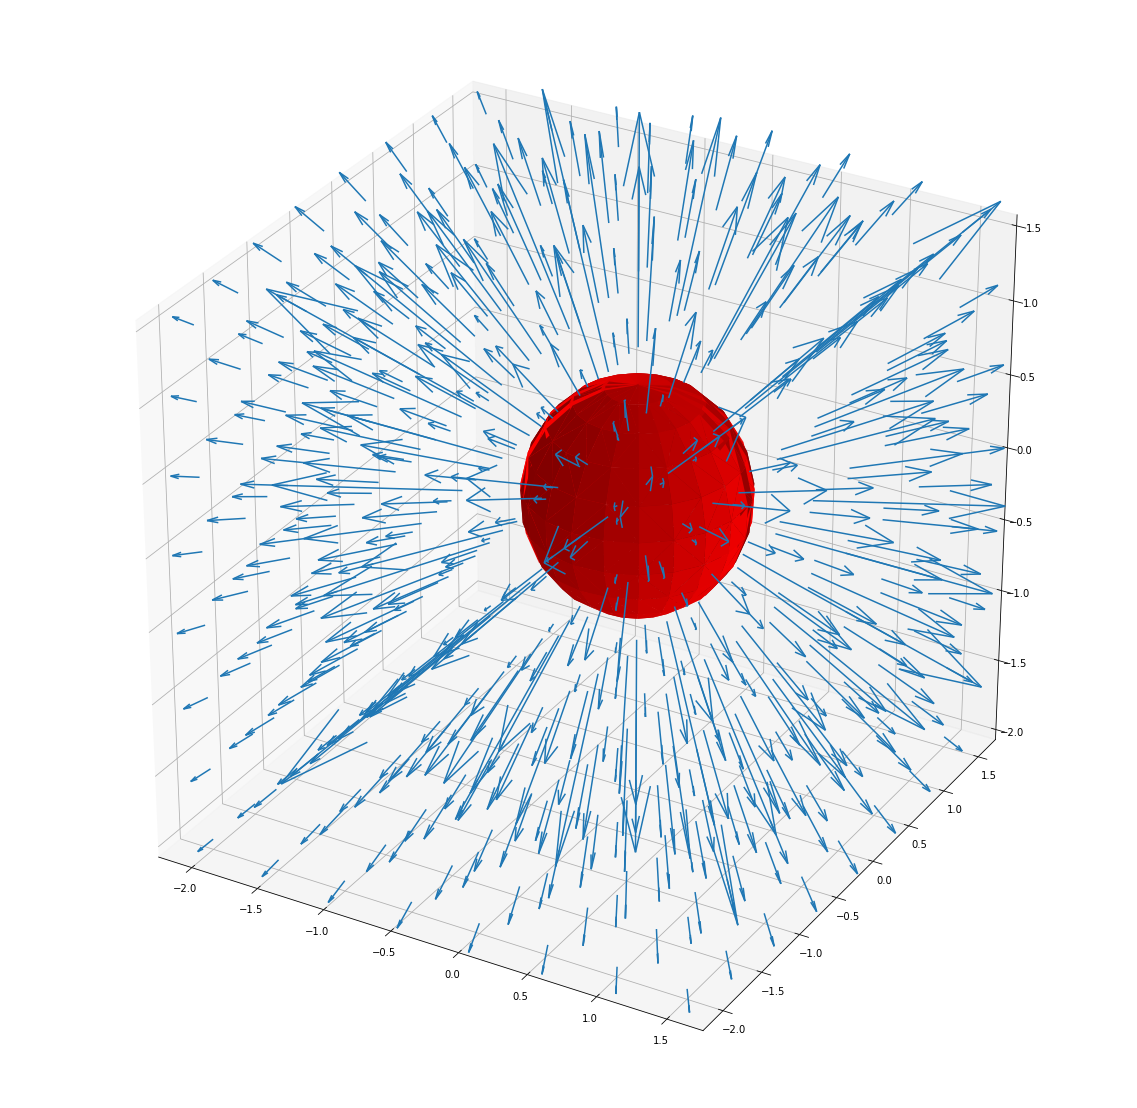

In [19]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

#Function definitions should be be able to fully describe the surface integral with a definite integral of both of the 
#parameters. Ex) for a sphere, you don't break it into x|b-a and y|hfun-gfun. you break it into theta|pi-0 and phi|2pi-0
#For sake of scipy.integral.dblquad, you must define the hfun and gfun to be the upper and lower bounds of the first variable
R=.75
def xt(theta,phi):
    return R*np.sin(theta)*np.cos(phi)
def yt(theta,phi):
    return R*np.sin(theta)*np.sin(phi)
def zt(theta,phi):
    return R*np.cos(theta)
def hfun(theta):
    return np.pi
def gfun(theta):
    return 0
def q(theta,phi):
    return 1.6e-10
b=2*np.pi
a=0
# r2=np.array([0,0,3])

# # print(Efield_surface(xt,yt,zt,a,b,gfun,hfun,q,r2))
x1, y1, z1 = np.meshgrid(np.arange(-2, 2, .5),
                      np.arange(-2, 2, .5),
                      np.arange(-2, 2, .5))
u=np.empty(x1.shape)
v=np.empty(y1.shape)
w=np.empty(z1.shape)

for i in range(x1.shape[0]):
    for j in range(y1.shape[1]):
        for l in range(z1.shape[2]):
            r2=np.array([x1[i][j][l],y1[i][j][l],z1[i][j][l]])
            u[i][j][l], v[i][j][l], w[i][j][l] = Efield_surface(xt,yt,zt,a,b,gfun,hfun,q,r2)
        

theta, phi =np.meshgrid(np.arange(a,b+1,.3),
                        np.arange(0,np.pi+1,.3))
theta=theta.flatten()
phi=phi.flatten()

x=xt(theta,phi)
y=yt(theta,phi)
z=zt(theta,phi)


fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.quiver(x1, y1, z1, u, v, w, length=.15)
tri = mtri.Triangulation(theta,phi)
ax.plot_trisurf(x,y,z, triangles=tri.triangles,color='r')


plt.show()


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D





x1, y1, z1 = np.meshgrid(np.arange(-2, 2, .5),
                      np.arange(-2, 2, .5),
                      np.arange(-2, 2, .5))
u=np.empty(x1.shape)
v=np.empty(y1.shape)
w=np.empty(z1.shape)

for i in range(x1.shape[0]):
    for j in range(y1.shape[1]):
        for l in range(z1.shape[2]):
            r2=np.array([x1[i][j][l],y1[i][j][l],z1[i][j][l]])
            u[i][j][l], v[i][j][l], w[i][j][l] = Efield_surface(xt,yt,zt,a,b,gfun,hfun,q,r2)
        

theta, phi =np.meshgrid(np.arange(a,b+1,.3),
                        np.arange(0,np.pi+1,.3))
theta=theta.flatten()
phi=phi.flatten()

x=xt(theta,phi)
y=yt(theta,phi)
z=zt(theta,phi)


fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.quiver(x1, y1, z1, u, v, w, length=.15)
tri = mtri.Triangulation(theta,phi)
ax.plot_trisurf(x,y,z, triangles=tri.triangles,color='r')


plt.show()


In [ ]:
video=system.readfile('video.mp4')
video.location(x=.8,=.8)